# Scipy:
# We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below.
# Task:
# 1.fitting it to the periodic function
# 2.plot the fit
# Data
# Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25
# Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
max_temp = np.array ([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

Text(0, 0.5, 'Temperature')

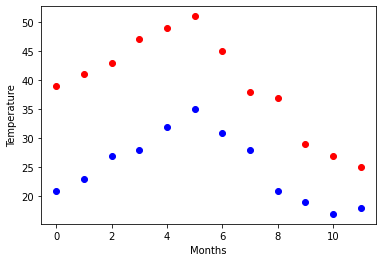

In [3]:
months = np.arange(12)
plt.plot(months,max_temp,'ro')
plt.plot(months,min_temp,'bo')
plt.xlabel('Months')
plt.ylabel('Temperature')

# Task 1.Fitting it to the periodic function

In [4]:
from scipy import optimize

def yearly_temp(times, avg , ampl , time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temp, months,
                                      max_temp, [20, 10, 0])

res_min, cov_min = optimize.curve_fit(yearly_temp, months,
                                      min_temp, [-40, 20, 0])

# Task 2. Plot the fit

Text(0, 0.5, 'Temperature')

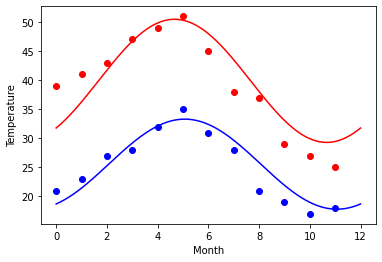

In [5]:
days = np.linspace(0,12,num=365)
plt.figure()
plt.plot(months,max_temp,'ro')
plt.plot(days,yearly_temp(days, *res_max), 'r-')
plt.plot(months, min_temp, 'bo')
plt.plot(days, yearly_temp(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature')

# Matplotlib:
# This assignment is for visualization using matplotlib:
# data to use:
# url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
# titanic = pd.read_csv(url)
# Charts to plot:
# 1. Create a pie chart presenting the male/female proportion
# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [6]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url)

# Q1. Create a pie chart presenting the male/female proportion

In [7]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
num_males = titanic['sex'].value_counts().male
num_females = titanic['sex'].value_counts().female

([<matplotlib.patches.Wedge at 0x1e1fcef6948>,
 [Text(-0.48083677220945115, 0.9893411941747885, 'male'),
  Text(0.48083667958064136, -0.9893412391939719, 'female')],
 [Text(-0.262274603023337, 0.5396406513680664, '64.4%'),
  Text(0.26227455249853165, -0.5396406759239846, '35.6%')])

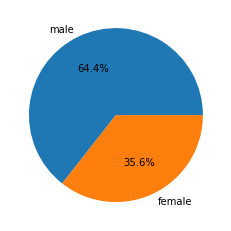

In [16]:
plt.pie([num_males,num_females],labels=['male','female'],autopct='%1.1f%%')

# Q.2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

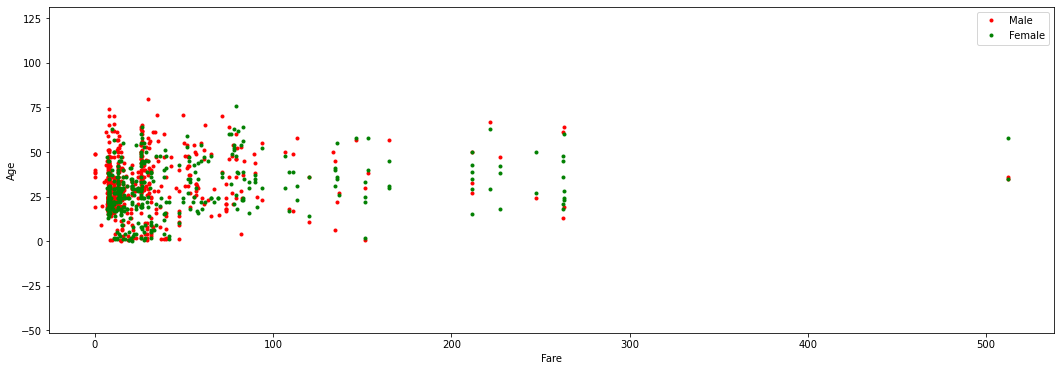

In [19]:
male = titanic[titanic['sex']=='male']
female = titanic[titanic['sex']=='female']
plt.figure(figsize=(18,6))
plt.plot(male.fare, male.age, '.r', label='Male')
plt.plot(female.fare, female.age, '.g', label='Female')
plt.axis('equal')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.legend()